In [1]:
!pip install wget
import wget
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from numpy.random import default_rng

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=2899b592553abb2beb7c02a06a6912581861474368c3f80a0a81520bbc397047
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


---
# Rotinas de Agrupamento (*Clustering*)

In [2]:
 # data: 2D-array (número de pontos)x(número de atributos)
 #       cada linha é um dado, com vários atributos
 #
 # centroides: 2D-array (número de clusters)x(número de atributos)
 #             cada linha é o representante (o centróide) de um cluster
 #
 # idxs: 1D-array (número de pontos)
 #       indica o cluster a que cada dado pertence

 def identificaClusters ( data, centroides ):
    k = np.shape( centroides )[0]
    n = np.shape( data )[0]
    distancias = np.zeros(( n, k ))
    for i in range( k ):
        distancias[ : , i ] = np.linalg.norm( data - centroides[i], axis=1 )
    idxs  = np.argmin( distancias, axis=1 )
    dists = np.amin( distancias, axis=1 )
    obj = np.linalg.norm( dists )**2 / n;
    return ( idxs, obj )

def expurgaClustersVazios ( idxs, centroides ):
    k = np.shape( centroides )[0]
    n = len( idxs )
    naoVazios = np.zeros( k ).astype(int)
    for i in range( n ): naoVazios[ idxs[ i ] ] = 1
    idxsNaoVazios = np.ravel( np.argwhere(naoVazios==1) )
    mapaIdxs = np.zeros( k ).astype(int)
    for i in range ( len( idxsNaoVazios ) ):
        mapaIdxs[ idxsNaoVazios[ i ] ] = i
    for i in range ( n ):
        idxs[ i ] = mapaIdxs[ idxs[ i ] ]
    return ( idxs , centroides[ idxsNaoVazios, : ] )

def calculaCentroides ( data, idxs ):
    k = max( idxs ) + 1
    n = len( idxs )
    centroides = np.zeros( ( k, np.shape(data)[1] ) )
    quantos = np.zeros( k ).astype(int)
    for i in range( n ):
        j = idxs[ i ]
        quantos[ j ] += 1
        centroides[ j, : ] += data[ i , : ]
    for i in range( k ):
        centroides[ i, : ] /= quantos[ i ]
    return ( centroides )

def inicializaClusters ( data, k ):
    n = np.shape(data)[0]
    i = 0
    q = n//k
    r = n%k
    idxs = np.zeros(( n )).astype(int)
    for l in range(k):
        quantos = q
        if l < r: quantos += 1
        idxs[ i:(i+quantos) ] = l*np.ones((quantos)).astype(int)
        i += quantos
    rng = default_rng()
    rng.shuffle( idxs )
    return ( idxs )

def geraClusters ( data, k, tol=0.005, vezes=3 ):
    best_obj = np.inf
    for i in range ( vezes ):
        idxs = inicializaClusters ( data, k )
        centroides = calculaCentroides ( data, idxs )
        obj_old = np.inf
        idxs, obj = identificaClusters( data, centroides )
        expurgaClustersVazios( idxs, centroides )
        while obj < (1-tol)*obj_old:
            obj_old = obj
            centroides = calculaCentroides ( data, idxs )
            idxs, obj = identificaClusters( data, centroides )
            expurgaClustersVazios( idxs, centroides )
        if obj < best_obj:
            best_obj = obj
            best_idxs = idxs
            best_centroides = centroides
    return ( best_idxs, best_centroides )

---
# Exemplo em $\mathbb{R}^2$

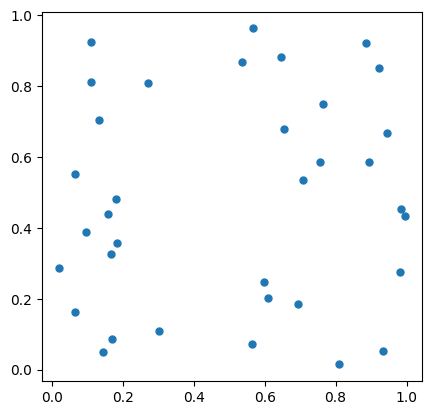

In [3]:
n = 35
k = 4

rng = default_rng()
data = rng.random((n,2))
x = data[:,0]
y = data[:,1]
plt.plot(x,y,'C0.',ms=10)
plt.gca().set_aspect('equal')

()

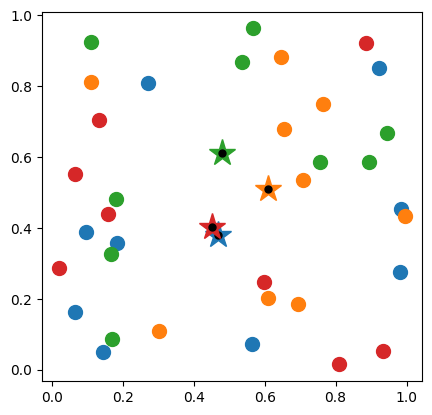

In [4]:
def plota_idxs_centroides():
    for l in range ( k ):
        idx_l = np.argwhere(idxs==l)
        plt.plot( x[idx_l], y[idx_l], 'C'+str(l%10)+'.', ms=20 )
        plt.plot( centroides[l,0], centroides[l,1], 'C'+str(l%10)+'*', ms=20 )
        plt.plot( centroides[l,0], centroides[l,1], 'k.', ms=10 )
        plt.gca().set_aspect('equal')
    return ()

idxs = inicializaClusters ( data, k )
centroides = calculaCentroides ( data, idxs )

plota_idxs_centroides()

()

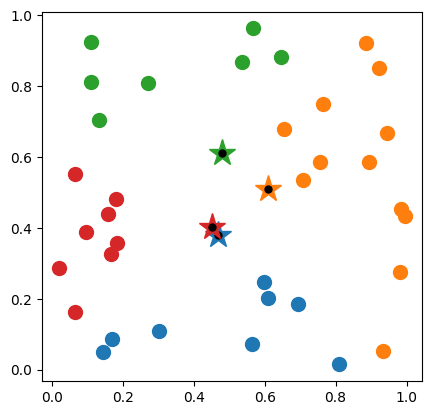

In [5]:
idxs, obj = identificaClusters( data, centroides )
expurgaClustersVazios( idxs, centroides )
k = np.shape( centroides )[0]


plota_idxs_centroides()

()

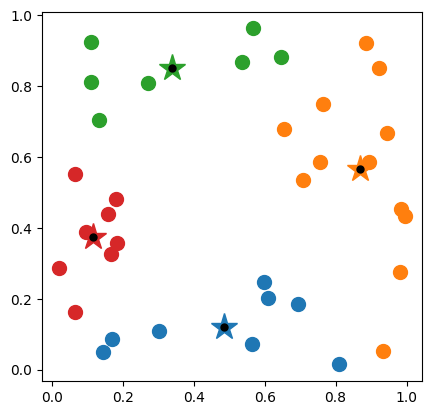

In [6]:
centroides = calculaCentroides ( data, idxs )

plota_idxs_centroides()

()

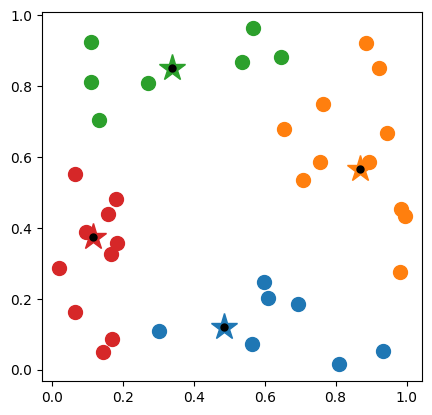

In [7]:
idxs, obj = identificaClusters( data, centroides )
expurgaClustersVazios( idxs, centroides )
k = np.shape( centroides )[0]

plota_idxs_centroides()

---
# Carrega uma Foto

### Aqui uma foto "pré-carregada".

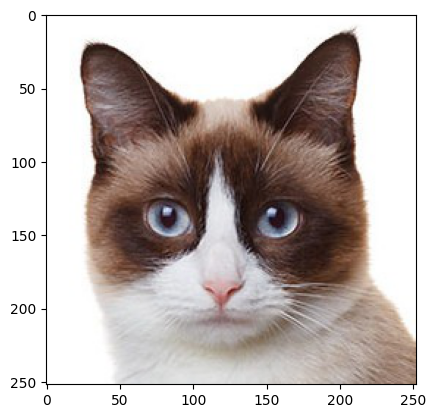

In [8]:
wget.download('https://raw.githubusercontent.com/paulo-goldfeld/public/master/cat.jpg')
imagem = plt.imread("cat.jpg")
plt.imshow( imagem )

### Aqui você pode carregar a sua própria foto, se preferir.
(Basta descomentar a célula abaixo.)

In [9]:
#files.upload()
#imagem = plt.imread("nome-do-arquivo.jpg")
#plt.imshow( imagem )


---
# Agrupa e substitui as Cores

3 clusters foram gerados.



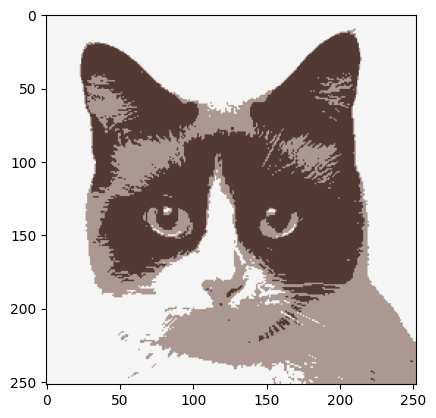

In [10]:
k = 3
npixels = np.shape(imagem)
data = np.reshape(imagem,(npixels[0]*npixels[1],3)).astype(float)
idxs, centroides = geraClusters ( data, k )
k = np.shape( centroides )[0]
print(k, "clusters foram gerados.\n")
for l in range ( k ):
    data[np.argwhere(idxs==l)] = centroides[l]
novaImagem = np.reshape(data,(npixels[0],npixels[1],3)).astype(int)
plt.imshow( novaImagem )